In [1]:
import pandas as pd
import numpy as np

#Colocar nombre de la estacion de contaminacion y la estacion metereologica
datos = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/Post-Procesing/df_tablaGN_metGA.csv')

#Creamos conjuntos de datos
X = datos.iloc[:,1:-1].values
y = datos.iloc[:,-1].values

In [177]:
#Dividir concunto de entrenamiento y de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [178]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_mod = sc_X.fit_transform(X_train)
X_test_mod = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train_mod = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test_mod = sc_y.transform(y_test.reshape(-1, 1))

In [179]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Error promedio: ' + str(np.mean(errors)))
    print('Precision: ' + str(accuracy))
    return accuracy

def evaluate2(model, test_features, test_labels):
    predictions = model.predict(test_features)
    predictions = sc_y.inverse_transform(predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Error promedio: ' + str(np.mean(errors)))
    print('Precision: ' + str(accuracy))
    return accuracy

In [180]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [181]:
##Inicializar la red neuronal
#network = Sequential()
##Añadimos la capas de entrada y primera capa oculta
#network.add(Dense(units = 10, kernel_initializer = "uniform", activation = "relu", input_dim=17))#14 de entrada
##Segunda capa oculta
#network.add(Dense(units = 8, kernel_initializer = "uniform", activation = "relu"))
#network.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu"))
#network.add(Dense(units = 4, kernel_initializer = "uniform", activation = "relu"))
#network.add(Dense(units = 3, kernel_initializer = "uniform", activation = "relu"))
##Capa de salida
#network.add(Dense(units = 1, kernel_initializer = "uniform"))

In [182]:
#Inicializar la red neuronal
network = Sequential()
#Añadimos la capas de entrada y primera capa oculta
network.add(Dense(units = 18, kernel_initializer = "uniform", activation = "relu", input_dim=17))#14 de entrada
#Segunda capa oculta
network.add(Dense(units = 36, kernel_initializer = "uniform", activation = "relu"))
network.add(Dense(units = 18, kernel_initializer = "uniform", activation = "relu"))
network.add(Dense(units = 9, kernel_initializer = "uniform", activation = "relu"))
network.add(Dense(units = 5, kernel_initializer = "uniform", activation = "relu"))
#Capa de salida
network.add(Dense(units = 1, kernel_initializer = "uniform"))

In [183]:
#Inicializar la red neuronal
network = Sequential()
#Añadimos la capas de entrada y primera capa oculta
network.add(Dense(units = 24, kernel_initializer = "uniform", activation = "relu", input_dim=17))#14 de entrada
#Segunda capa oculta
#network.add(Dense(units = 48, kernel_initializer = "uniform", activation = "relu"))
#network.add(Dense(units = 24, kernel_initializer = "uniform", activation = "relu"))
#network.add(Dense(units = 12, kernel_initializer = "uniform", activation = "relu"))
#network.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu"))
#network.add(Dense(units = 3, kernel_initializer = "uniform", activation = "relu"))
#Capa de salida
network.add(Dense(units = 1, kernel_initializer = "uniform"))

In [184]:
print(network.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 24)                432       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 25        
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________
None


In [185]:
#Compilar la red neuronal
network.compile(optimizer = "adam", loss = 'mean_squared_error')#, metrics=['cosine']

#entrenamiento
network.fit(X_train_mod, y_train_mod, batch_size = 5, epochs = 25)

Epoch 1/25
806/806 [==============================] - 13s 16ms/step - loss: 0.7121
Epoch 2/25
806/806 [==============================] - 1s 1ms/step - loss: 0.4986
Epoch 3/25
806/806 [==============================] - 1s 1ms/step - loss: 0.4818
Epoch 4/25
806/806 [==============================] - 1s 1ms/step - loss: 0.4645
Epoch 5/25
806/806 [==============================] - 1s 1ms/step - loss: 0.4543
Epoch 6/25
806/806 [==============================] - 1s 1ms/step - loss: 0.4426
Epoch 7/25
806/806 [==============================] - 1s 1ms/step - loss: 0.4359
Epoch 8/25
806/806 [==============================] - 1s 1ms/step - loss: 0.4331
Epoch 9/25
806/806 [==============================] - 1s 1ms/step - loss: 0.4273
Epoch 10/25
806/806 [==============================] - 1s 1ms/step - loss: 0.4268
Epoch 11/25
806/806 [==============================] - ETA: 0s - loss: 0.424 - 1s 1ms/step - loss: 0.4283
Epoch 12/25
806/806 [==============================] - 1s 1ms/step - loss: 0.4184

In [186]:
y_pred = network.predict(X_test_mod)

In [187]:
resultado = evaluate2(network, X_test_mod, y_test)

Error promedio: 13.413810104530844
Precision: 43.843638765068945


In [188]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=network, epochs=100, batch_size=10, verbose=0)

In [189]:
from sklearn.pipeline import Pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('re', KerasRegressor(build_fn=network, epochs=100, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)

In [190]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
kf = KFold(n_splits=5)

#score = predictor.score(X_train_mod,y_train_mod)
#print("Metrica del modelo", score)

scores = cross_val_score(model, X_train_mod, y_train_mod, cv=kf, scoring='r2', error_score=0)
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

y_pred = network.predict(X_test_mod)
print(r2_score(y_pred, y_test_mod))
print('regreso de la estandarizacion:' + str(r2_score(sc_y.inverse_transform(y_pred), y_test)))

C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:559: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
TypeError: __call__() missing 1 required positional argument: 'inputs'

  FitFailedWarning)


Metricas cross_validation [0 0 0 0 0]
Media de cross_validation 0.0
0.4344529830942727
regreso de la estandarizacion:0.4344529812761825


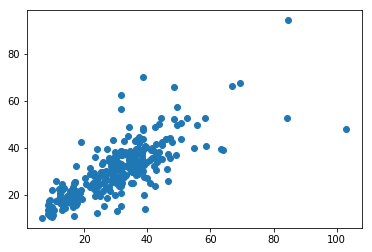

In [192]:
from matplotlib import pyplot as plt
plt.scatter(y_test, sc_y.inverse_transform(y_pred))

In [193]:
sc_y.inverse_transform(y_pred)[sc_y.inverse_transform(y_pred) < 0]

array([], dtype=float32)

In [194]:
y_test[y_test < 0]

array([], dtype=float64)

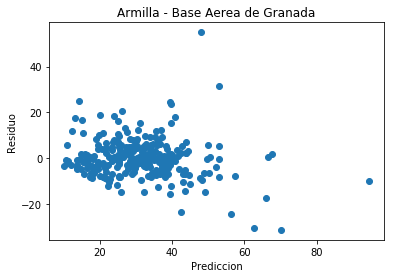

In [196]:
from matplotlib import pyplot as plt
plt.scatter(sc_y.inverse_transform(y_pred), sc_y.inverse_transform(y_test_mod) - sc_y.inverse_transform(y_pred))
plt.xlabel('Prediccion')
plt.ylabel('Residuo')
plt.title('Armilla - Base Aerea de Granada')
plt.show()